In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

In [71]:
# n = 15   # A mayor n mayor cantidad de operaciones por temperatura necesito 
# Jota = 1
# Malla = np.ones((n,n))


# for i in range(n):
#     for j in range(n):
#         a = random.random()
#         if a >= 0.5:
#             Malla[i,j] = -1

#print(Malla) 
# plt.imshow(Malla)
# plt.show()

In [72]:
# Magnetizacion = 0
# for i in range(n):
#     for j in range(n):
#         Energia = -Jota * (Malla[i,j] *(Malla[i-1,j] + Malla[i,j-1])) 
#         Magnetizacion += Malla[i,j]
        
# Magnetizacion_T = Magnetizacion #Magnetizacion en todos los estados
# Energia_T = Energia
# Energia_cuadrada = Energia**2

[array([-0.33409082]), array([-0.33167448]), array([-0.34012438]), array([-0.35036154]), array([-0.34805853]), array([-0.35492534]), array([-0.35533672]), array([-0.36482181]), array([-0.35872415]), array([-0.36096216]), array([-0.37426808]), array([-0.37252811]), array([-0.38644658]), array([-0.39475142]), array([-0.38673498]), array([-0.38859612]), array([-0.3889707]), array([-0.40504281]), array([-0.41845025]), array([-0.42355161]), array([-0.41582523]), array([-0.41435318]), array([-0.41972779]), array([-0.42317509]), array([-0.42885435]), array([-0.44401217]), array([-0.45984914]), array([-0.44486389]), array([-0.44310372]), array([-0.45136369]), array([-0.47083899]), array([-0.46999255]), array([-0.47091462]), array([-0.46804801]), array([-0.47569286]), array([-0.48406165]), array([-0.48299764]), array([-0.48890412]), array([-0.49376472]), array([-0.50598413]), array([-0.52551568]), array([-0.50440645]), array([-0.51550768]), array([-0.53388996]), array([-0.53380371]), array([-0.

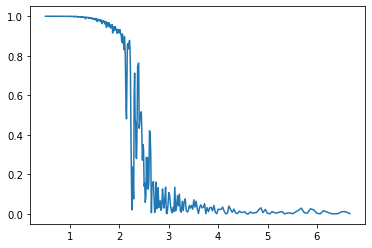

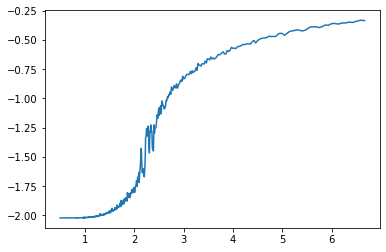

In [8]:
n = 24
Jota = 1
Malla = np.ones((n,n))


for i in range(n):
    for j in range(n):
        a = random.random()
        if a >= 0.5:
            Malla[i,j] = -1



Magnetizacion = 0
for i in range(n):
    for j in range(n):
        Energia = -Jota * (Malla[i,j] *(Malla[i-1,j] + Malla[i,j-1])) 
        Magnetizacion += Malla[i,j]
        
Magnetizacion_T = Magnetizacion #Magnetizacion en todos los estados
Energia_T = Energia
Energia_cuadrada = Energia**2


MagnetizacionEvo = []
Magnetizacion_ult = []
Energia_ult = []
EnergiaCM = []
Temperatura = []
Cambios = 0

operaciones = 100000
barrido = np.linspace(0.15,2,1000)

for InvTemperatura in barrido:
    for i in range(operaciones):
        
       Numero = np.random.rand(1)
       K = np.round(np.random.rand(1)*(n*n-1))
       J = np.floor(K/n).astype(int)
       I = (K - J * n).astype(int)
        
       Variacion_de_energia = 2 * Jota * Malla[I,J] * (Malla[I,J-1] + Malla[I-1,J] + Malla[I,J+1-n] + Malla[I+1-n,J]) 
    
       if Variacion_de_energia < 0:
              Malla[I,J] = - Malla[I,J]
              Magnetizacion += 2 * Malla[I,J]
              Energia += Variacion_de_energia 
              Cambios += 1  
              
       elif Variacion_de_energia > 0:
              Parametro = np.exp(-Variacion_de_energia * InvTemperatura)
              if Parametro > Numero:
                 Malla[I,J] = - Malla[I,J]
                 Magnetizacion += 2 * Malla[I,J]
                 Energia += Variacion_de_energia
                 Cambios += 1  
                    
       Energia_T += Energia  
       Energia_cuadrada += Energia**2
       Magnetizacion_T += Magnetizacion
       

    Temperatura.append(1/InvTemperatura)
    Magnetizacion_parcial = Magnetizacion_T/((operaciones+2)*n**2)
    Energia_parcial = Energia_T/((operaciones+2)*n**2)
    Energia_CM = Energia_cuadrada/((operaciones+2)*n**2)
    

    Magnetizacion_ult.append(abs(Magnetizacion_parcial))
    Energia_ult.append(Energia_parcial)
    EnergiaCM.append(Energia_CM)
    
    Magnetizacion_T = copy.copy(Magnetizacion_parcial)
    Energia_T = copy.copy(Energia_parcial)
    Energia_cuadrada = copy.copy(Energia_CM)
    

plt.plot(Temperatura,Magnetizacion_ult)
plt.show()
plt.plot(Temperatura,Energia_ult)
plt.show()

[9392.47757048]



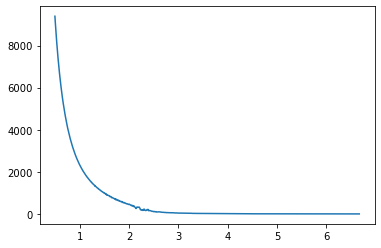

In [9]:
Calor = []
for i in range(len(Temperatura)):
    T = Temperatura[i]**2
    A = EnergiaCM[i]
    B = Energia_ult[i]**2
    C = (A-B)/T
    Calor.append(C)

print(C)
print()
plt.plot(Temperatura,Calor)
plt.show()